# Welcome to Jupyter!

[[ 6.5971892  -0.60309275]
 [ 4.64347456  0.8111324 ]
 [ 5.64842067 -1.78217701]
 [ 7.0262128  -0.45153039]
 [ 6.72439891  0.22129946]
 [ 5.16178369 -0.7510247 ]
 [ 6.88937861  0.34141167]
 [ 5.41640176 -2.22351376]
 [ 6.00291007 -1.91235238]
 [ 5.12552583  1.58415742]] [[3.59578175 7.0044291 ]
 [5.20875166 4.83800936]
 [4.24194776 5.21783909]
 [3.45208353 5.35660743]
 [4.43834223 3.76437837]
 [2.98293393 3.78692043]
 [4.72863156 6.30100121]
 [5.39383472 4.49588324]
 [4.11276653 4.68354366]
 [5.25809443 4.28443063]]


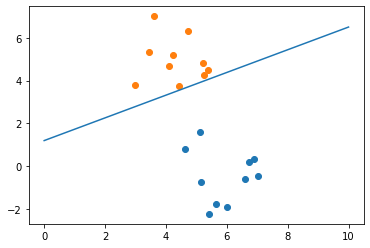

In [7]:
#(a)
import matplotlib.pyplot as plt
import numpy as np
#f(x) = 0.5x + 1.5
plt.plot([0,10],[1.2,6.5])
N = 20
mean1 = [6,0]
cov1 = [[1,0],[0,1]]
mean2 = (4,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)
# print(X1,X2)
plt.scatter(X1[:,0],X1[:,1],marker='o')
plt.scatter(X2[:,0],X2[:,1],marker='o')
plt.show()

第1次修正
第2次修正
第3次修正
第4次修正
第5次修正
第6次修正
第7次修正
第8次修正
第9次修正
第10次修正
第11次修正
第12次修正
第13次修正
第14次修正
第15次修正
第16次修正
[[ 6.5971892  -0.60309275]
 [ 4.64347456  0.8111324 ]
 [ 5.64842067 -1.78217701]
 [ 7.0262128  -0.45153039]
 [ 6.72439891  0.22129946]
 [ 5.16178369 -0.7510247 ]
 [ 6.88937861  0.34141167]
 [ 5.41640176 -2.22351376]
 [ 6.00291007 -1.91235238]
 [ 5.12552583  1.58415742]] [[3.59578175 7.0044291 ]
 [5.20875166 4.83800936]
 [4.24194776 5.21783909]
 [3.45208353 5.35660743]
 [4.43834223 3.76437837]
 [2.98293393 3.78692043]
 [4.72863156 6.30100121]
 [5.39383472 4.49588324]
 [4.11276653 4.68354366]
 [5.25809443 4.28443063]]


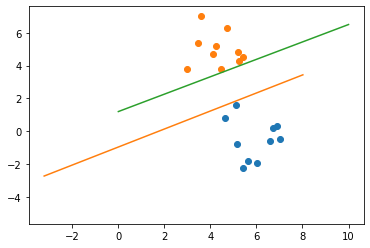

In [8]:
#(b)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while True:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:]))<=0:
            w=w+learning_rate*y[i]*X[i,:]
            w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w)
        if np.all(predict==y):
            break
    return w,w_record
 
#指示函数
def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
 
#二维测试数据生成
# mean1=[0,0]
# cov1=[[1,0],[0,1]]
# mean2=[3,3]
# cov2=[[1,0],[0,1]]
# X1=np.random.multivariate_normal(mean1,cov1,50)
# X2=np.random.multivariate_normal(mean2,cov2,50

#改为使用(a)的数据生成


#绘制散点图
# print(X1,X2)
# plt.scatter(X1[:,0],X1[:,1])
# plt.scatter(X2[:,0],X2[:,1])
#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,0.01)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
ax.plot([0,10],[1.2,6.5])

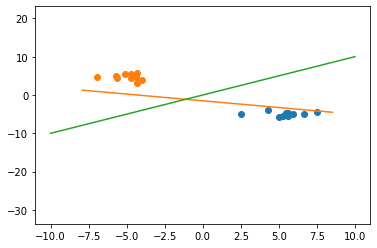

In [9]:
#(c)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
N = 20
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while True:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:]))<=0:
            w=w+learning_rate*y[i]*X[i,:]
            w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w)
        if np.all(predict==y):
            break
    return w,w_record
 

def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
 


#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,0.01)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
ax.plot([-10,10],[-10,10])

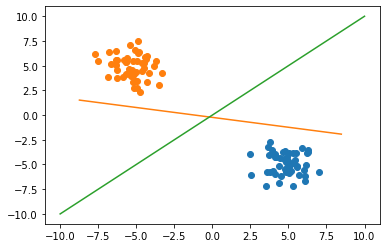

In [10]:
#(d)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
N = 100
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while True:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:]))<=0:
            w=w+learning_rate*y[i]*X[i,:]
            w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w)
        if np.all(predict==y):
            break
    return w,w_record
 

def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
 


#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,0.01)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
ax.plot([-10,10],[-10,10])

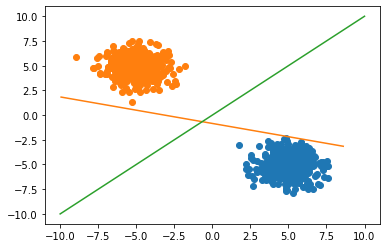

In [12]:
#(e)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
N = 1000
mean1 = [5,-5]
cov1 = [[1,0],[0,1]]
mean2 = (-5,5)
cov2 = [[1,0],[0,1]]
X1 = np.random.multivariate_normal(mean1,cov1,N//2)
X2 = np.random.multivariate_normal(mean2,cov1,N//2)

#感知机学习算法
def Percetron_Learning(X,y,learning_rate):
    m,n=X.shape
    w_record=[]
    X=np.column_stack((X,np.ones(m)))
    w=np.random.random(n+1)
    w_record.append(w.copy())
    iter=0
    while True:
        i=np.random.randint(m)
        if y[i]*(w.dot(X[i,:]))<=0:
            w=w+learning_rate*y[i]*X[i,:]
            w_record.append(w.copy())
            iter+=1
            # print("第"+str(iter)+"次修正")
            continue
        predict=sgn(X,w)
        if np.all(predict==y):
            break
    return w,w_record
 

def sgn(X,w):
    predict=np.dot(X,w)
    predict[predict>0]=1
    predict[predict<0]=-1
    predict[predict==0]=0
    return predict
 
 


#PLA算法求系数
X = np.row_stack((X1,X2))
y = np.ones(N)
y[0:N//2] = -1
w,w_record = Percetron_Learning(X,y,0.01)

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1])
ax.scatter(X2[:,0],X2[:,1])
x = np.arange(X.min()-1,X.max()+1,0.01)
w0 = w_record[0]
line, = ax.plot(x, (-w0[0]*x-w0[2])/w0[1])
 
def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
 
def animate(i):
    if i == len(w_record):
        return
    w = w_record[i]
    line.set_ydata((-w[0]*x-w[2])/w[1])  # update the data.
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, interval=2, blit=True, save_count=50)
ax.plot(x,(-w[0]*x-w[2])/w[1])
ax.plot([-10,10],[-10,10])